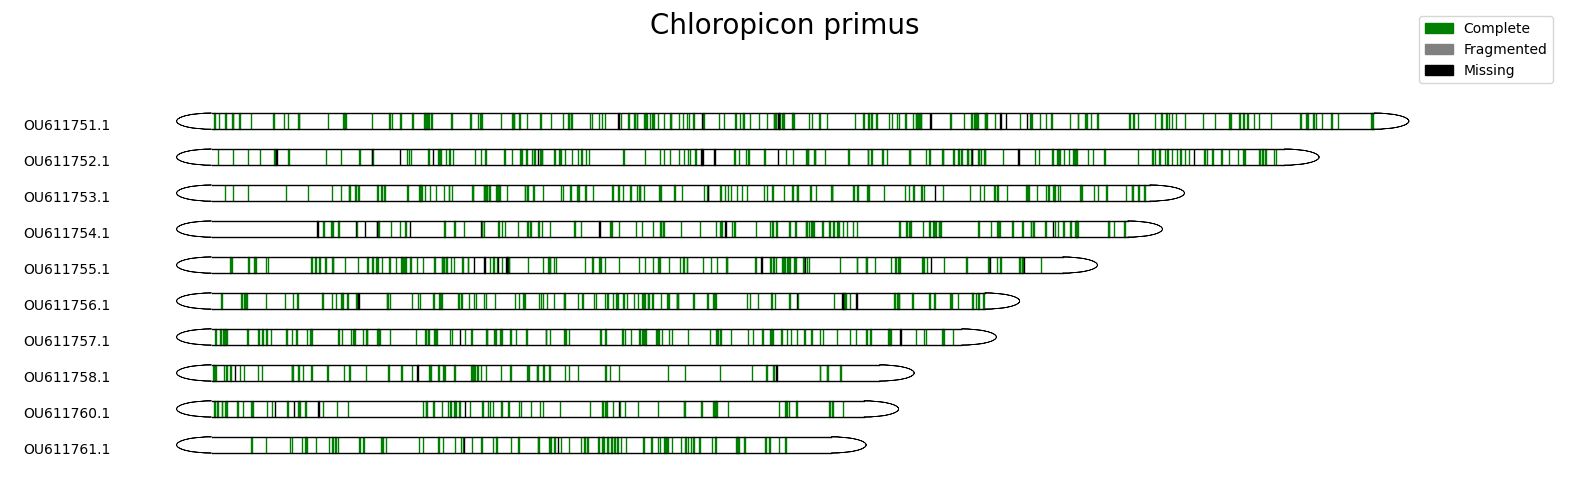

In [1]:
from buscoplotpy.karyoplot import karyoplot

karyoplot("/home/lorenzo/Documenti/microalghe/Chlorophyta/Dunaliella_primolecta_2/GCA_914767535.2/GCA_914767535.2_ucDunPrim2.2_genomic_karyotype.tsv", 
          "/home/lorenzo/Documenti/microalghe/Chlorophyta/Dunaliella_primolecta_2/GCA_914767535.2/busco_out/run_chlorophyta_odb10/full_table.tsv", 
          "test1.png", "Chloropicon primus", chrs_limit=10, plt_show=True, palette="green")

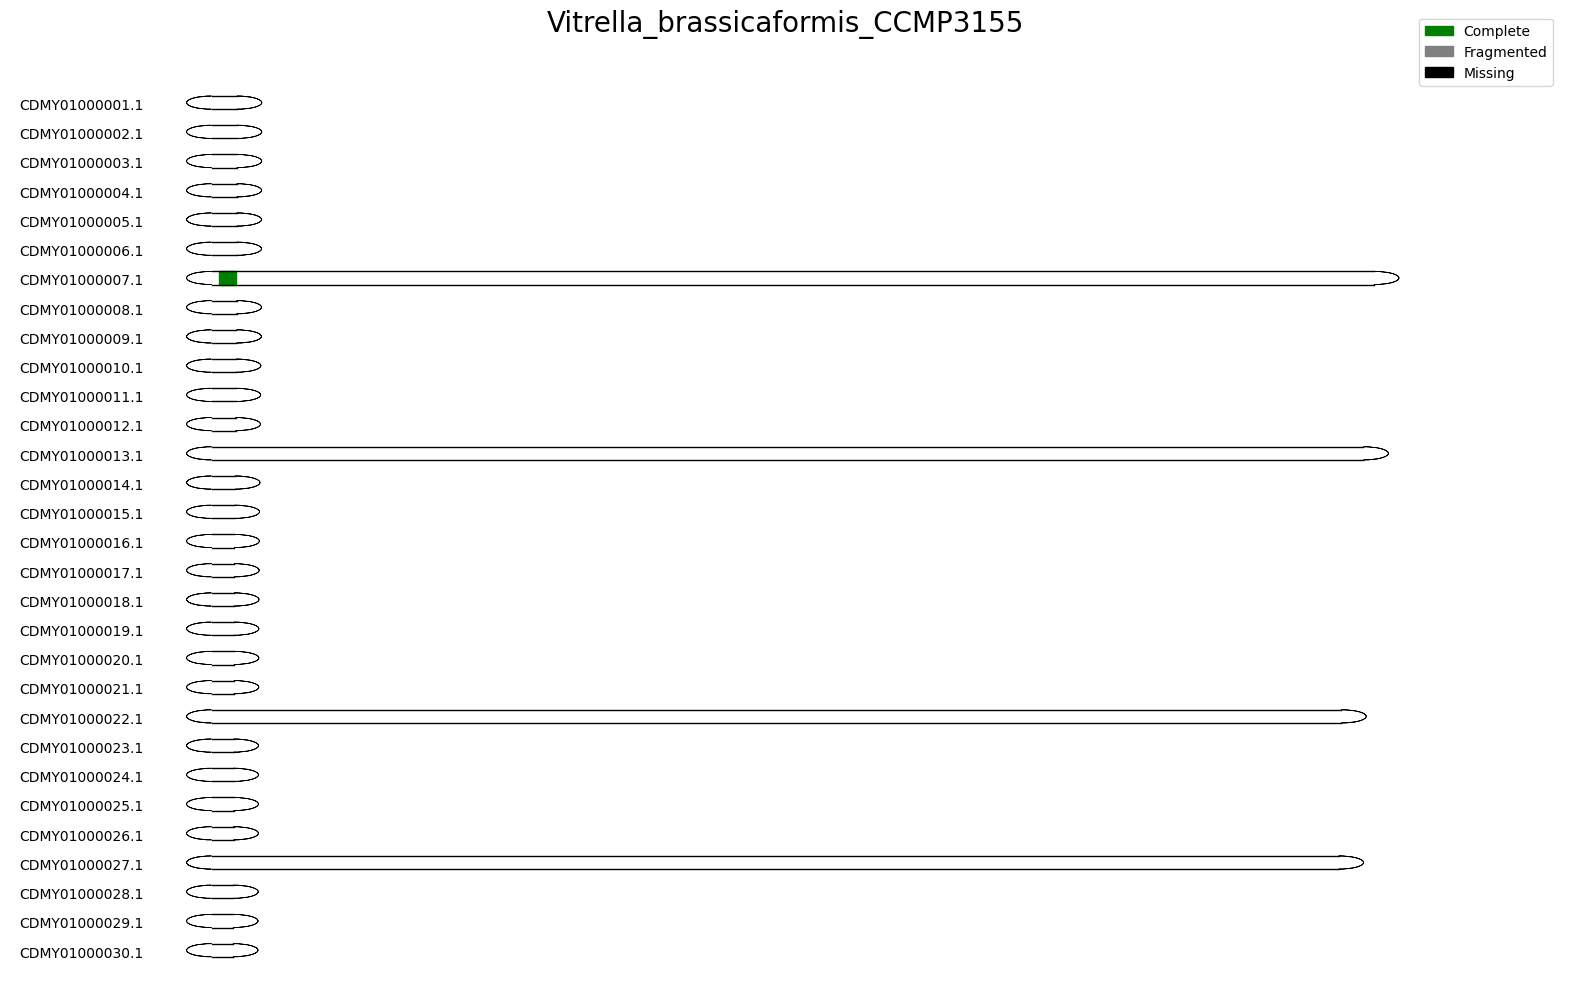

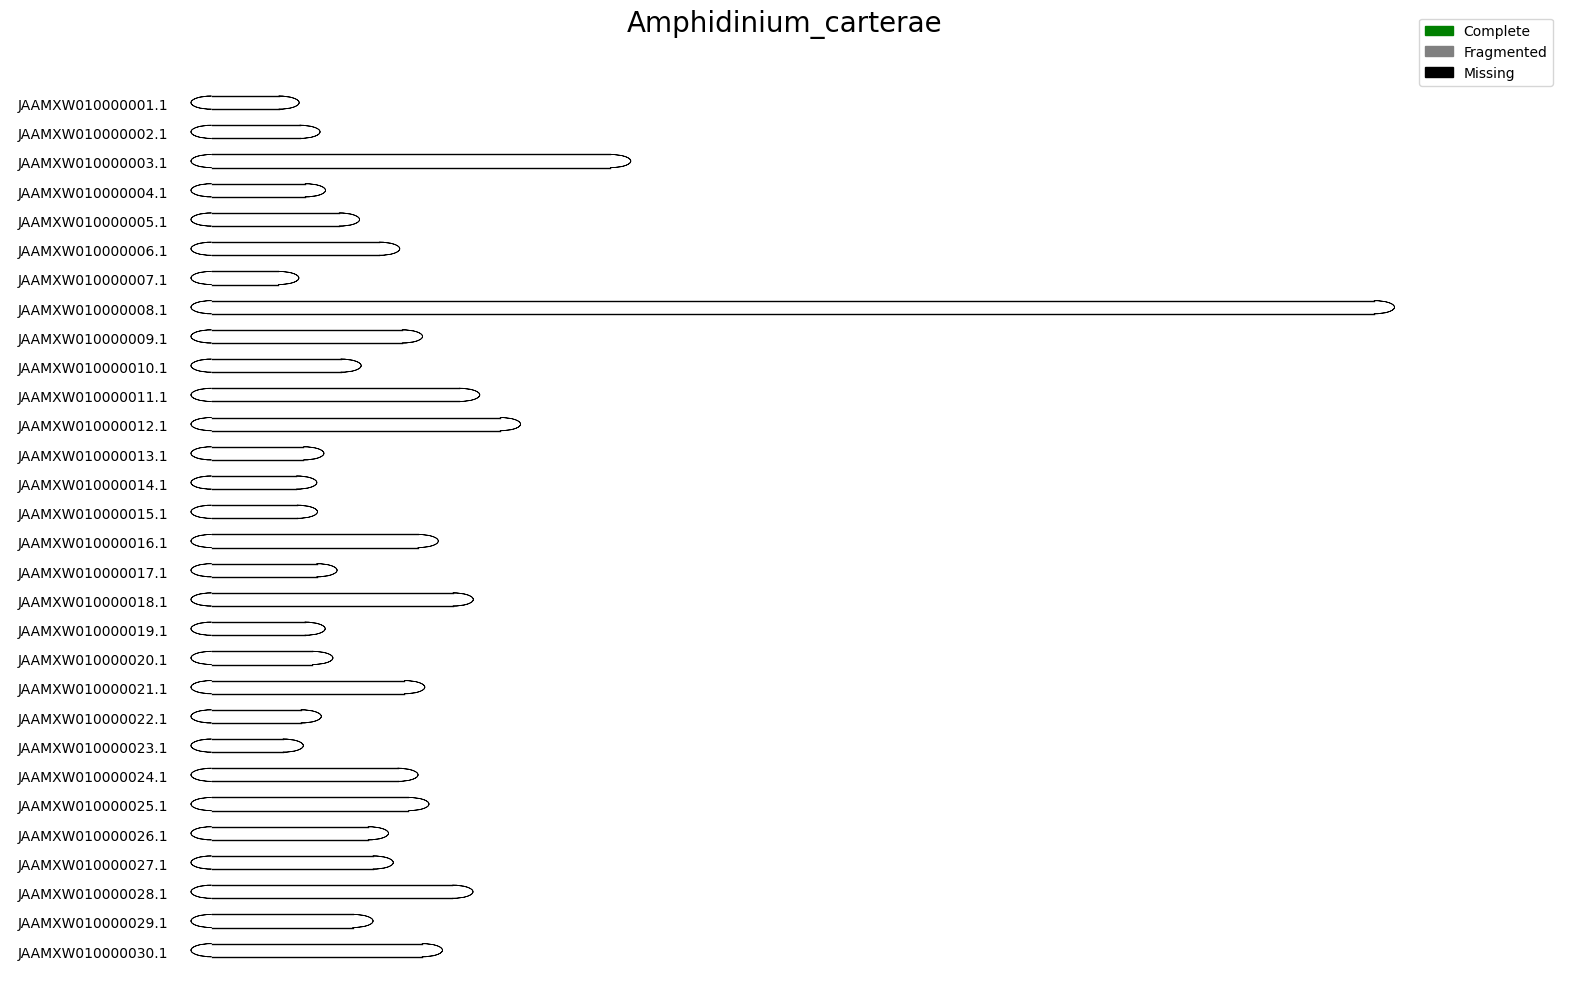

In [1]:
# Importing libraries

import pandas as pd
import os
import json
import re
from load_busco_fulltable import load_busco_fulltable
from karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_results"

# Input directory
dir = "/home/lorenzo/Documenti/microalghe/"

directories = ['Alveolata',]# 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

summary_features = [
    'id',
    'group',
    'organism',
    'version',
    'max_intron',
    'max_seq_len',
    'metaeuk_parameters',
    'metaeuk_rerun_parameters',
    'contig_break',
    'scaffold_composition',
    'gene_predictor',
    'dataset_name',
    'number_of_buscos',
    'number_of_species',
    'metaeuk_version',
    'bbtools_version',
    'busco_version',
    'hmmsearch_version',
    'one_line_summary',
    'complete',
    'single copy',
    'multi copy',
    'fragmented',
    'missing',
    'n_markers',
    'domain',
    'number_of_scaffolds',
    'number_of_contigs',
    'total length',
    'percent gaps',
    'scaffold N50',
    'contigs N50',
]

full_table_features = [
        'group',
        'organism',
        'genome_version',
        'busco_id',
        'status',
        'sequence',
        'gene_start',
        'gene_end',
        'strand',
        'score',
        'length',
        'ortho_db_url',
        'description',
]

i = 1

busco_run_pattern = r"run*"
json_pattern = r"*.json"
karyotype_pattern = r"karyotype.tsv$"

summary_data = pd.DataFrame(columns=summary_features)
fulltable_data = pd.DataFrame(columns=full_table_features)

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + group)

    # Iterate on each organism
    for organism in os.listdir():

        os.chdir(organism)

        # Iterate on each genome version
        for genome_version in os.listdir():

            os.chdir(genome_version)
            os.chdir('./busco_out')

            run_dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

            os.chdir(run_dirs[0])

            for file in os.listdir():
                if file.endswith(".json"):
                    with open(file, "r") as f:
                        dict = json.load(f)

                        summary_data.loc[len(summary_data)] = {
                            'id': i,
                            'group': group,
                            'organism': organism,
                            'version': genome_version,
                            'max_intron': dict['parameters']['max_intron'],
                            'max_seq_len': dict['parameters']['max_seq_len'],
                            'metaeuk_parameters': dict['parameters']['metaeuk_parameters'],
                            "metaeuk_rerun_parameters": dict['parameters']['metaeuk_rerun_parameters'],
                            "contig_break": dict['parameters']['contig_break'],
                            "scaffold_composition": dict['parameters']['scaffold_composition'],
                            "gene_predictor": dict['parameters']['gene_predictor'],
                            'dataset_name': dict['lineage_dataset']['name'],
                            'number_of_buscos': dict['lineage_dataset']['number_of_buscos'],
                            'number_of_species': dict['lineage_dataset']['number_of_species'],
                            'metaeuk_version': dict['versions']['metaeuk'],
                            'bbtools_version': dict['versions']['bbtools'],
                            'busco_version': dict['versions']['busco'],
                            'hmmsearch_version': dict['versions']['hmmsearch'],
                            'one_line_summary': dict['results']['one_line_summary'],
                            'complete': dict['results']['Complete'],
                            'single copy': dict['results']['Single copy'],
                            'multi copy': dict['results']['Multi copy'],
                            'fragmented': dict['results']['Fragmented'],
                            'missing': dict['results']['Missing'],
                            'n_markers': dict['results']['n_markers'],
                            'domain': dict['results']['domain'],
                            'number_of_scaffolds': dict['results']['Number of scaffolds'],
                            'number_of_contigs': dict['results']['Number of contigs'],
                            'total length': dict['results']['Total length'],
                            'percent gaps': dict['results']['Percent gaps'],
                            'scaffold N50': dict['results']['Scaffold N50'],
                            'contigs N50': dict['results']['Contigs N50']
                        }

                        tmp_table = load_busco_fulltable(os.getcwd() + '/full_table.tsv', group, organism, genome_version)

                        #fulltable_data = pd.concat([fulltable_data if not fulltable_data.empty else None, tmp_table])

                        os.chdir('../..')
                        
                        karyotype_file = [k for k in os.listdir() if re.search(karyotype_pattern, k)]

                        karyoplot(karyotype_file=karyotype_file[0], busco_fulltable=tmp_table, output_file=os.getcwd() + '/karyotype_plot.png', title=organism, dpi=300)

                        del tmp_table
                        
                        i += 1

                        f.close()

            os.chdir('..')
        os.chdir('..')
    os.chdir('..')

summary_data.reset_index(drop=True, inplace=True)
#fulltable_data.reset_index(drop=True, inplace=True)

# Saving the complete summary table in a csv file
#fulltable_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_fulltable_" + filename + '.csv', index=False)
#summary_data.to_csv("/home/lorenzo/Documenti/microalghe/microalghe_summary_" + filename + '.csv', index=False)

In [10]:
import pandas as pd

# Assuming df1 and df2 are your two DataFrames
# df1 is the DataFrame you want to sort
# df2 contains the keys based on which you want to sort df1

# Example DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3, 4, 5, 6], 'Value': ['A', 'B', 'C', 'D', 'A', 'D']})
df2 = pd.DataFrame({'ID': [3, 1, 4, 2], 'Value': ['A', 'B', 'C', 'D']})

# Set the key column as the index for both DataFrames
#df2 = df1.set_index('Value')
df2 = df2.set_index('Value')

# Sort df1 based on the order of keys in df2
#sorted_df = df1.loc[df2.index]
#
## Reset the index if needed
#sorted_df = sorted_df.reset_index()

# Display the sorted DataFrame
df2.loc[['A', 'D']]

,ID
Value,
A,3
D,2


In [7]:
df1['Value'].value_counts().sort_values(ascending=False).index.to_list()[:2]

['A', 'D']

In [21]:
df = pd.read_csv("karyotype.tsv", sep='\t')
df

,Chr,Start,End
0,CP031034.1,0,1876603
1,CP031035.1,0,1764478
2,CP031036.1,0,1475055
3,CP031037.1,0,1467028
4,CP031038.1,0,1105792
5,CP031039.1,0,1089399
6,CP031040.1,0,832080
7,CP031041.1,0,802619
8,CP031042.1,0,781388
9,CP031043.1,0,755390


In [15]:
df.set_index('Chr', inplace=True)

In [18]:
c = df.loc[['CP031048.1', 'CP031051.1']].copy()

In [20]:
c.reset_index()

,Chr,Start,End
0,CP031048.1,0,580184
1,CP031051.1,0,477077
